#### DOMAIN:
 - Face Recognition
#### CONTEXT:
- Company X intends to build a face identification model to recognise human faces.
#### DATA DESCRIPTION:
- The dataset comprises of images and its mask where there is a human face.
#### PROJECT OBJECTIVE:
- Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import necessary libraries
import re
import numpy as np
from PIL import Image
import cv2
import random
import os
import numpy as np
import pandas as pd
import cv2
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import preprocess_input
#from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
# used to supress display of warnings
import warnings
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

#### Q1: Unzip, read and Load data(‘PINS.zip’) into session.

In [3]:
#Import libraries
from tqdm.notebook import trange, tqdm
from IPython.display import Image, display, Markdown, clear_output
from zipfile import ZipFile

In [4]:
%cd /content/drive/MyDrive/AIML_Program/ComputerVision/Project/

/content/drive/MyDrive/AIML_Program/ComputerVision/Project


In [5]:
project_path = '/content/drive/MyDrive/AIML_Program/ComputerVision/Project/'


#### Unzip the files

In [6]:
# from zipfile import ZipFile

# # specifying the zip file name
# file_name = project_path + "PINS.zip"

# # opening the zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     # zip.printdir()

#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

In [7]:
directory = '/content/drive/MyDrive/AIML_Program/ComputerVision/Project/PINS/'
#/content/drive/MyDrive/AIML_Program/ComputerVision/Project/PINS/PINS

#### Rename the images

In [8]:
# for filename in os.listdir(directory):
#     os.rename(os.path.join(directory,filename),os.path.join(directory, filename.replace(' ', '_').upper()))
#     str = "pins_"
#     if str in filename:
#         filepath = os.path.join(directory, filename)
#         newfilepath = os.path.join(directory, filename.replace(str, ""))
#         os.rename(filepath, newfilepath)

# for subdir, dirs, files in os.walk(directory):
#     for file in files:
#       os.rename(os.path.join(subdir, file), os.path.join(subdir, file.replace(' ', '_')))

#### Display all the labels

In [9]:
import glob

paths = glob.glob("/content/drive/MyDrive/AIML_Program/ComputerVision/Project/PINS/*")
label_names = [os.path.split(x)[1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format((label_names)))

Total labels: 100
Labels: ['pins_Aaron Paul', 'pins_alexandra daddario', 'pins_Alvaro Morte', 'pins_alycia debnam carey face', 'pins_Amanda Crew', 'pins_Amaury Nolasco', 'pins_amber heard face', 'pins_Anna Gunn', 'pins_anne hathaway', 'pins_barbara palvin face', 'pins_bellamy blake face', 'pins_Benedict Cumberbatch', 'pins_Betsy Brandt', 'pins_bill gates', 'pins_Brenton Thwaites', 'pins_brie larson', 'pins_Brit Marling', 'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan', 'pins_chadwick boseman face', 'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt', 'pins_Cobie Smulders', 'pins_Danielle Panabaker', 'pins_Dave Franco', 'pins_david mazouz', 'pins_Dominic Purcell', 'pins_drake', 'pins_dua lipa face', 'pins_Dwayne Johnson', 'pins_eliza taylor', 'pins_elizabeth olsen face', 'pins_elon musk', 'pins_Emilia Clarke', 'pins_Emily Bett Rickards', 'pins_Emma Stone', 'pins_emma watson face', 'pins_gal gadot face', 'pins_grant gustin face', 'pins_Gwyneth Paltrow', 'pins_

#### Q2: Write function to create metadata of the image.

In [10]:
df = pd.DataFrame(columns=['Person', 'Num_Images','Filepath', 'Files'])

folders = [x[0] for x in os.walk(directory)]

for subfolders in folders:
  fileList = os.listdir(subfolders)
  filePath = os.path.abspath(subfolders)
  person = (subfolders)[len(directory):]
  #df = df.append({'Person': person, 'Num_Images': len(fileList), 'FilePath': filePath , 'Files':fileList}, ignore_index=True)
  df = pd.concat([df, pd.DataFrame({'Person': [person], 'Num_Images': [len(fileList)], 'FilePath': [filePath] , 'Files': [fileList]})], ignore_index=True)

df

,Person,Num_Images,Filepath,Files,FilePath
0,,100,NaN,"[pins_Aaron Paul, pins_alexandra daddario, pin...",/content/drive/MyDrive/AIML_Program/ComputerVi...
1,pins_Aaron Paul,86,NaN,"[Aaron Paul0_262.jpg, Aaron Paul101_247.jpg, A...",/content/drive/MyDrive/AIML_Program/ComputerVi...
2,pins_alexandra daddario,165,NaN,"[alexandra daddario0.jpg, alexandra daddario1....",/content/drive/MyDrive/AIML_Program/ComputerVi...
3,pins_Alvaro Morte,91,NaN,"[Alvaro Morte1_799.jpg, Alvaro Morte100_825.jp...",/content/drive/MyDrive/AIML_Program/ComputerVi...
4,pins_alycia debnam carey face,144,NaN,"[alycia debnam carey face1.jpg, alycia debnam ...",/content/drive/MyDrive/AIML_Program/ComputerVi...
...,...,...,...,...,...
96,pins_Ursula Corbero,80,NaN,"[Ursula Corbero1_2410.jpg, Ursula Corbero10_23...",/content/drive/MyDrive/AIML_Program/ComputerVi...
97,pins_Wentworth Miller,113,NaN,"[Wentworth Miller0.jpg, Wentworth Miller10.jpg...",/content/drive/MyDrive/AIML_Program/ComputerVi...
98,pins_Willa Holland,147,NaN,"[Willa Holland0.jpg, Willa Holland1.jpg, Willa...",/content/drive/MyDrive/AIML_Program/ComputerVi...
99,pins_William Fichtner,139,NaN,"[William Fichtner0.jpg, William Fichtner1.jpg,...",/content/drive/MyDrive/AIML_Program/ComputerVi...


##### View few random images

In [11]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (300, 100))
grid = ImageGrid(fig, 111, nrows_ncols=(100, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("PINS", label, "*.jpg"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1

plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Lets works on features/targets

In [12]:
#Get training folder path.
TRAIN_FOLDER= "PINS"

In [13]:
from glob import glob
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAIN_FOLDER):
    class_folder_path = os.path.join(TRAIN_FOLDER, class_folder_name)
    class_label = class_folder_name

    for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missing value ignore it
          missing += 1
          continue
        images.append(image_bgr)

        classes.append(class_label)

In [14]:
len(images)

10770

Seems there are no missing values in the image dataset.

Do preprocessing of all the images

In [15]:
# resize image
def resize_images(image):

  image = np.array(image).astype(np.uint8)
  res_image = cv2.resize(image,(224,224), interpolation = cv2.INTER_CUBIC)
  return res_image

#Store resized images.
images = [resize_images(image) for image in images]

In [16]:
images[0].shape

(224, 224, 3)

Fetch shape of images and classes.

In [17]:
images = np.array(images)
classes = np.array(classes)
print("Shape of images : ", images.shape)
print("Shape of classes : ", classes.shape)

Shape of images :  (10770, 224, 224, 3)
Shape of classes :  (10770,)


See the distribution of the classes/labels for all the images

In [18]:
import matplotlib as mp

values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

values.sort()

code=np.arange(0,13,1)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

fig, ax = plt.subplots(figsize=(150,50))
#ax.bar(labels, values, color=color_map(data_normalizer(code)))
ax.bar(labels, values)
plt.xticks(fontsize = 60, rotation='vertical')
plt.yticks(fontsize = 70, rotation='vertical')
plt.xlabel("Species", fontsize = 80)
plt.ylabel("Number of images", fontsize = 80)
plt.title("Distribution of images in each class", fontsize=100)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

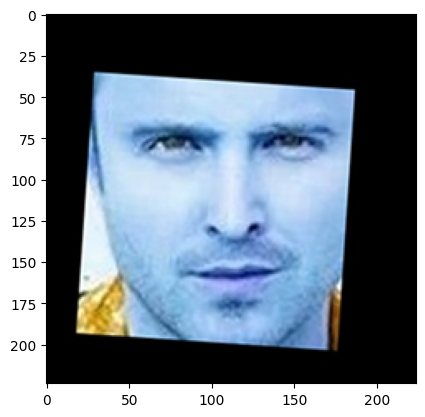

In [19]:
plt.imshow(images[30])

Lets view plot for random image and its class

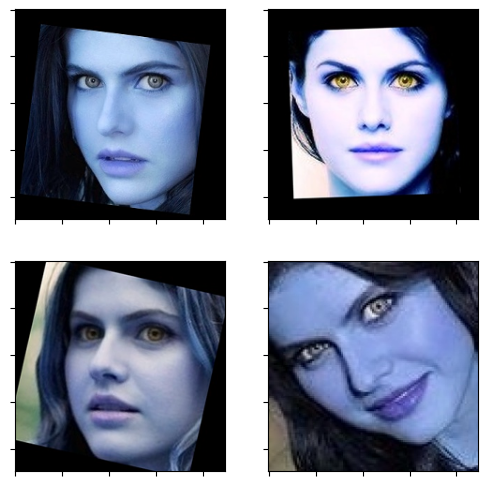

In [20]:
def plot_per_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1
plot_per_class("pins_alexandra daddario")

Q2: Function to create metadata of an image.

In [21]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

#### Q3: Write a loop to iterate through each and every image and create metadata for all the images.

In [22]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata(directory)

In [23]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Q4: Generate Embeddings vectors on the each face in the dataset.

Lets install keras-vgg pkg, use pretrained vgg weights, create VGG face model.

In [24]:
!pip install keras-vggface

In [25]:
pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 


Load pretrained VGG face weights.

In [26]:
weights_file = project_path + 'VGG_FACE_WEIGHTS.H5'

Create VGG face model

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

# Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load VGG Face model weights
model.load_weights(weights_file)

In [28]:
# Remove last Softmax layer and get model upto last flatten layer.
vgg_face_descriptor=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [29]:
type(vgg_face_descriptor)

keras.src.engine.functional.Functional

In [30]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

Generate Embeddings for each image in the dataset.

Lets get embeddeing vector for the first image in the dataset as an example

In [31]:
# Get embedding vector for first image in the metadata using the pre-trained model
image_path = metadata[0].image_path()
image = load_image(image_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
image = (image / 255.).astype(np.float32)
image = cv2.resize(image, dsize = (224,224))
print(image.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(image, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 2s 2s/step
(2622,)


In [32]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.031703044, numpy.ndarray, numpy.float32)

In [33]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(-0.012434018, -0.008693828, 0.0021908146)

#### Generate Embeddings for all the images
- Iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict(), store in a list with name embeddings.

- For any image read error in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is 2622 length.

In [34]:
total_images = len(metadata)

print('Total images :', total_images)

Total images : 10770


In [35]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    image_path = metadata[i].image_path()
    image = load_image(image_path)
    image = (image / 255.).astype(np.float32)
    image = cv2.resize(image, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(image, axis=0))[0]
    embeddings[i]=embedding_vector

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 648ms/step


In [36]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (10770, 2622)


In [37]:
embeddings[0], embeddings[500], embeddings[500].shape

(array([ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
         0.00219081, -0.00908097]),
 array([ 0.01788179,  0.00028065, -0.00088316, ..., -0.02847725,
        -0.01038696,  0.02783972]),
 (2622,))

In [38]:
embeddings[7000]

array([ 0.01175116,  0.01194192, -0.00399914, ..., -0.0063604 ,
        0.00874744,  0.00564542])

#### Q5: Build distance metrics for identifying the distance between two similar and dissimilar images.

In [39]:
#Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2.
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

Calculate distance between for random images and plot the images.
- 650, 651 and 800, 1000
- 120, 1101 and 5001, 5002
- 1201, 1202 and 115, 7500

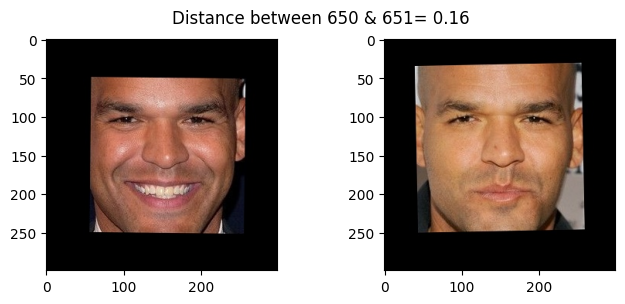

In [40]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

show_pair(650, 651)


Distance between similar images at index 650,651 shown as 0.16 which confirms the similarity.

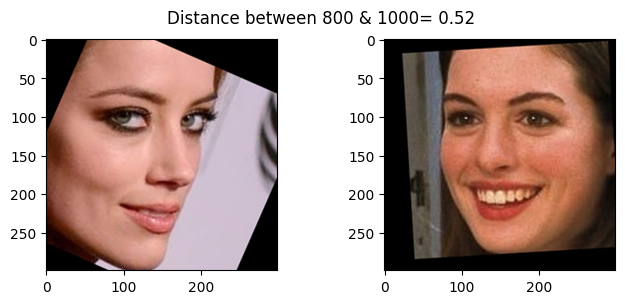

In [41]:
#distance between dissimilar images
show_pair(800, 1000)

Distance between images at index 800 and 100 shown as 52 which confirms dissimilarity.

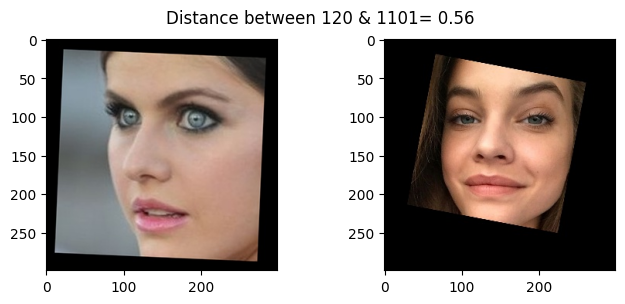

In [42]:
show_pair(120, 1101)

Distance between images at index 120 and 1101 shown as 0.56 which confirms dissimilarity.

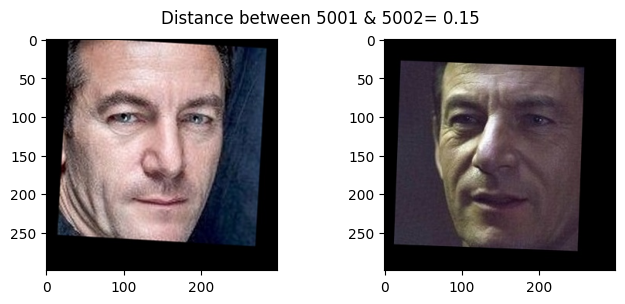

In [43]:
show_pair(5001, 5002)

Distance between images at index 5001, 5002 is 0.15 which confirms high similarity.

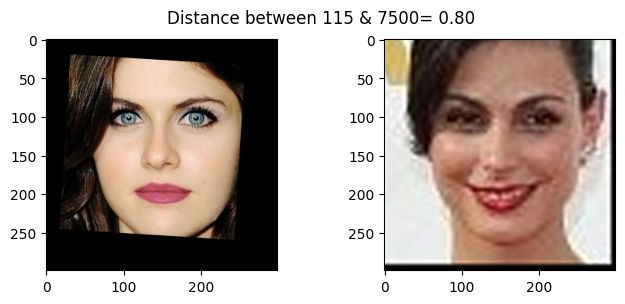

In [44]:
show_pair(115, 7500)

Distance between images at index 150, 7500 is 0.80 which confirms high dissimilarity.

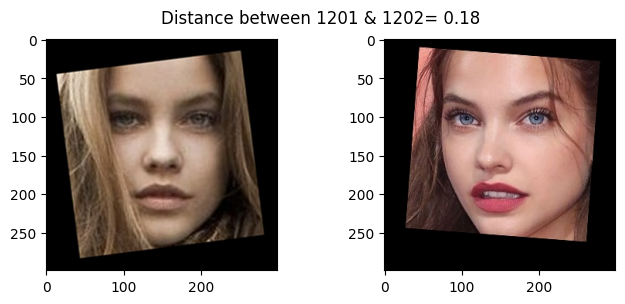

In [45]:
show_pair(1201, 1202)

Distance between images 1201 and 1202 is 0.18 which confirms high similarity

#### Q6: Use PCA for dimensionality reduction.

##### Lets create Train and Test sets:
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels.
- Use test_idx to seperate out testing features and labels.

In [46]:
# #EVery 10th sample goes in test data and rest goes to train data.
# train_index = np.arange(metadata.shape[0]) % 9 != 0
# test_index = np.arange(metadata.shape[0]) % 9 == 0

# # one half as train examples of 10 identities
# X_train = embeddings[train_index]

# # another half as test examples of 10 identities
# X_test = embeddings[test_index]

# targets = np.array([m.name for m in metadata])

# #train labels
# y_train = targets[train_index]

# #test labels
# y_test = targets[test_index]

In [47]:
# print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
# print('y_train shape : ({0},)'.format(y_train.shape[0]))
# print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
# print('y_test shape : ({0},)'.format(y_test.shape[0]))

In [48]:
# y_test[50], y_train[800]

In [49]:
# len(np.unique(y_test)), len(np.unique(y_train))

Encode the labels using label encoder.

In [50]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)

In [51]:
# print(le.classes_)
# y_test_encoded = le.transform(y_test)

In [52]:
# print('y_train_encoded : ', y_train_encoded)
# print('y_test_encoded : ', y_test_encoded)

Standardize the feature values
- Scale the features using standardscalar()

In [53]:
# # Standarize features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_s = scaler.fit_transform(X_train)

In [54]:
# X_test_s = scaler.transform(X_test)

Reduce feature dimensions using Principal Component Analysis(PCA)
- Set the parameter n_components=128

In [55]:
# print('X_train_s shape : ({0},{1})'.format(X_train_s.shape[0], X_train_s.shape[1]))
# print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
# print('X_test_s shape : ({0},{1})'.format(X_test_s.shape[0], X_test_s.shape[1]))
# print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

In [56]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=128)
# X_train_pca = pca.fit_transform(X_train_s)
# X_test_pca = pca.transform(X_test_s)

#### Q7: Build an SVM classifier in order to map each image to its right person.

In [57]:
# from sklearn.svm import SVC

# clf = SVC(C=5., gamma=0.001)
# clf.fit(X_train_pca, y_train_encoded)

In [58]:
# y_predict = clf.predict(X_test_pca)

In [59]:
# print('y_predict : ',y_predict)
# print('y_test_encoded : ',y_test_encoded)

In [60]:
# y_predict_encoded = le.inverse_transform(y_predict)

In [61]:
# print('y_predict_encoded : ',y_predict_encoded)

In [62]:
# print('y_predict shape : ', y_predict.shape)
# print('y_test_encoded shape : ', y_test_encoded.shape)

In [63]:
# y_test_encoded[0:20]

In [64]:
# # Find the classification accuracy
# accuracy_score(y_test_encoded, y_predict)

In [65]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(classes)

num_classes = len(np.unique(y))
num_classes

100

In [66]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [67]:
random_seed = 2
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [68]:
print(f"#### Shapes of Train, Test and Validation sets are: {X_train.shape},{X_test.shape},{X_val.shape}")

#### Shapes of Train, Test and Validation sets are: (7539, 224, 224, 3),(1615, 224, 224, 3),(1616, 224, 224, 3)


In [69]:
print(f"#### Shapes of Train, Test and Validation sets of Target are: {y_train.shape},{y_test.shape},{y_val.shape}")

#### Shapes of Train, Test and Validation sets of Target are: (7539,),(1615,),(1616,)


#### Classification using Supervised Learning Techniques


In [70]:
def flatten(X):
  Xr, Xg, Xb = [],[],[]
  for samples in X:
    r, g, b = cv2.split(samples)
    Xr.append(r.flatten())
    Xg.append(g.flatten())
    Xb.append(b.flatten())
  Xr = np.array(Xr)
  Xg = np.array(Xg)
  Xb = np.array(Xb)
  return (Xr, Xg, Xb)

In [71]:
X_train_r, X_train_g, X_train_b = flatten(X_train)
X_test_r, X_test_g, X_test_b = flatten(X_test)
X_val_r, X_val_g, X_val_b = flatten(X_val)

In [ ]:
X_train_r.shape, X_train_g.shape, X_train_b.shape,
X_test_r.shape, X_test_g.shape, X_test_b.shape,
X_val_r.shape, X_val_g.shape, X_val_b.shape

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA

n_components = 128
X_train_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_r)
X_train_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_g)
X_train_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_b)

X_test_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_r)
X_test_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_g)
X_test_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_b)

X_val_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_r)
X_val_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_g)
X_val_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_b)

In [ ]:
Xr_train_pca = X_train_pca_r.transform(X_train_r)
Xg_train_pca = X_train_pca_g.transform(X_train_g)
Xb_train_pca = X_train_pca_b.transform(X_train_b)

Xr_test_pca = X_test_pca_r.transform(X_test_r)
Xg_test_pca = X_test_pca_g.transform(X_test_g)
Xb_test_pca = X_test_pca_b.transform(X_test_b)

Xr_val_pca = X_val_pca_r.transform(X_val_r)
Xg_val_pca = X_val_pca_g.transform(X_val_g)
Xb_val_pca = X_val_pca_b.transform(X_val_b)

#### Q9:Import and display the the test images.
 ‘Benedict Cumberbatch9.jpg’ and  ‘Dwayne Johnson4.jpg’ are test images.

In [ ]:
%cd /content/drive/MyDrive/AIML_Program/ComputerVision/Project/

In [ ]:
#Read BENEDICT CUMBERBATCH9.JPG image
import cv2
from google.colab.patches import cv2_imshow
image = 'Benedict Cumberbatch9.jpg'
image = cv2.imread(image)
cv2_imshow(image)

In [ ]:
#Read DWAYNE JOHNSON4.JPG image from the directory path
image = 'Dwayne Johnson4.jpg'
image = cv2.imread(image)
cv2_imshow(image)

#### Q9: Use the trained SVM model to predict the face on both test images

In [ ]:
|